EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000010, Nesterov: 0
Train on 12000 samples, validate on 1000 samples
Epoch 1/10
 - 42s - loss: 0.9870 - accuracy: 0.6358 - val_loss: 0.7654 - val_accuracy: 0.7190
Epoch 2/10
 - 41s - loss: 0.6943 - accuracy: 0.7376 - val_loss: 0.4777 - val_accuracy: 0.8220
Epoch 3/10
 - 41s - loss: 0.5933 - accuracy: 0.7769 - val_loss: 0.4476 - val_accuracy: 0.8420
Epoch 4/10
 - 41s - loss: 0.5291 - accuracy: 0.8004 - val_loss: 0.4597 - val_accuracy: 0.8270
Epoch 5/10
 - 41s - loss: 0.4759 - accuracy: 0.8182 - val_loss: 0.3987 - val_accuracy: 0.8730
Epoch 6/10
 - 41s - loss: 0.4366 - accuracy: 0.8411 - val_loss: 0.3749 - val_accuracy: 0.8760
Epoch 7/10
 - 41s - loss: 0.3979 - accuracy: 0.8518 - val_loss: 0.5197 - val_accuracy: 0.8120
Epoch 8/10
 - 41s - loss: 0.3571 - accuracy: 0.8630 - val_loss: 0.3929 - val_accuracy: 0.8740
Epoch 9/10
 - 41s - loss: 0.3327 - accuracy: 0.8771 - val_loss: 0.4180 - val_accuracy: 0.8580
Epoch 10/10
 - 41s - loss: 0.3037 - ac

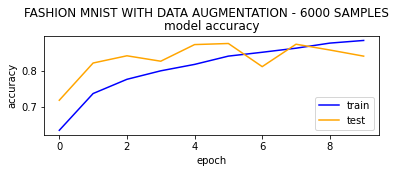

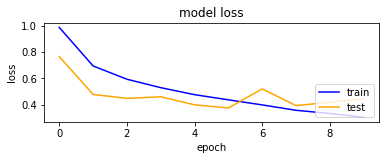

EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000010, Nesterov: 0


In [0]:
### FASHION MNIST WITH DATA AUGMENTATION ###

# Import libraries
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) =fashion_mnist.load_data()
# X_Train6000, X_Test6000, Y_Train6000, X_Test6000 = train_test_split(trainX)
trainX = trainX[0:6000]
trainY = trainY[0:6000]
testX = testX[0:1000]
testY = testY[0:1000]
# print(Train6000X.shape)

# specify the arguments
rotation_range_val = 30
width_shift_val = 0.2
height_shift_val = 0.2
shear_range_val=45
zoom_range_val=[0.9,1.1]

# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 3
num= num_row*num_col

############################
"""# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(trainX[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(trainY[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(trainX.reshape(trainX.shape[0], 28, 28, 1),trainY.reshape(trainY.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()
"""
for X, Y in datagen.flow(trainX.reshape(trainX.shape[0], 28, 28, 1),trainY.reshape(trainY.shape[0], 1),batch_size=6000,shuffle=False):

     break

#Combine augmented and original into one matrix
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
trainX = np.concatenate((trainX, X), axis=0)
trainX = trainX.reshape((trainX.shape[0], 28, 28))
trainY = np.concatenate((trainY, trainY), axis=0)

#######################################
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0.00001
NestVal = False
LearningRateArray = []

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# define the learning rate change 
def exp_decay(epoch):
    lrate = LearningRate * np.exp(-DecayVal*epoch)
    LearningRateArray.append(lrate)
    return lrate

# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]


# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
#history = cnn4.fit_generator(trainX, trainY, steps_per_epoch=steps, epochs=EpochNum, callbacks=callbacks_list , validation_data=(testX, testY), verbose=2, shuffle = True)
history = cnn4.fit(trainX, trainY, epochs=EpochNum, callbacks=callbacks_list , validation_data=(testX, testY), verbose=2, shuffle = True)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.suptitle('FASHION MNIST WITH DATA AUGMENTATION - 6000 SAMPLES')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))


In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))

1000/1000 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.96      0.99      0.98       105
           2       0.85      0.75      0.79       111
           3       0.85      0.84      0.84        93
           4       0.87      0.60      0.71       115
           5       0.88      0.99      0.93        87
           6       0.48      0.72      0.57        97
           7       0.97      0.89      0.93        95
           8       0.99      0.94      0.96        95
           9       0.95      0.96      0.95        95

    accuracy                           0.84      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.84      0.84      1000



EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000000, Nesterov: 0
Train on 6000 samples, validate on 1000 samples
Epoch 1/10
 - 20s - loss: 0.7274 - accuracy: 0.7423 - val_loss: 2.1041 - val_accuracy: 0.1990
Epoch 2/10
 - 20s - loss: 0.4316 - accuracy: 0.8448 - val_loss: 1.4317 - val_accuracy: 0.5220
Epoch 3/10
 - 20s - loss: 0.3478 - accuracy: 0.8760 - val_loss: 0.9809 - val_accuracy: 0.6660
Epoch 4/10
 - 20s - loss: 0.3045 - accuracy: 0.8893 - val_loss: 0.6376 - val_accuracy: 0.7800
Epoch 5/10
 - 20s - loss: 0.2545 - accuracy: 0.9088 - val_loss: 0.4444 - val_accuracy: 0.8500
Epoch 6/10
 - 20s - loss: 0.2294 - accuracy: 0.9193 - val_loss: 0.4700 - val_accuracy: 0.8490
Epoch 7/10
 - 20s - loss: 0.1976 - accuracy: 0.9282 - val_loss: 0.4327 - val_accuracy: 0.8540
Epoch 8/10
 - 20s - loss: 0.1627 - accuracy: 0.9445 - val_loss: 0.3969 - val_accuracy: 0.8720
Epoch 9/10
 - 20s - loss: 0.1503 - accuracy: 0.9445 - val_loss: 0.3926 - val_accuracy: 0.8650
Epoch 10/10
 - 20s - loss: 0.1208 - acc

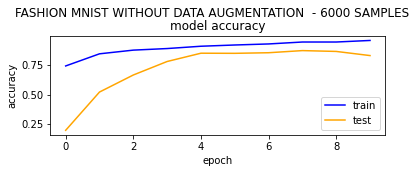

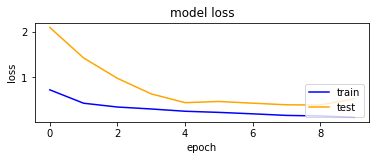

In [0]:
# fashion Mnist without Augmenting

from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) =fashion_mnist.load_data()
trainX = trainX[0:6000]
trainY = trainY[0:6000]
testX = testX[0:1000]
testY = testY[0:1000]

# create the class object
#datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
#datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns



trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0
NestVal = False

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#cnn4.summary()

# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
#it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
#steps = int(trainX.shape[0] / 64)
#history = cnn4.fit(trainX, trainY, steps_per_epoch=64, epochs=EpochNum, validation_data=(testX, testY), verbose=2)
history = cnn4.fit(trainX, trainY,
              batch_size=64,
              epochs=10,
              validation_data=(testX, testY),
              shuffle=True, verbose = 2)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('model accuracy')
plt.suptitle('FASHION MNIST WITHOUT DATA AUGMENTATION  - 6000 SAMPLES')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))

11493376/11490434 [==============================] - 1s 0us/step
EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000010, Nesterov: 0
Train on 12000 samples, validate on 1000 samples
Epoch 1/10
 - 47s - loss: 0.6408 - accuracy: 0.7954 - val_loss: 0.2375 - val_accuracy: 0.9390
Epoch 2/10
 - 42s - loss: 0.2672 - accuracy: 0.9147 - val_loss: 0.0917 - val_accuracy: 0.9700
Epoch 3/10
 - 42s - loss: 0.1746 - accuracy: 0.9465 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 4/10
 - 42s - loss: 0.1327 - accuracy: 0.9583 - val_loss: 0.0759 - val_accuracy: 0.9720
Epoch 5/10
 - 42s - loss: 0.0996 - accuracy: 0.9661 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 6/10
 - 43s - loss: 0.0747 - accuracy: 0.9749 - val_loss: 0.0708 - val_accuracy: 0.9770
Epoch 7/10
 - 42s - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0.0864 - val_accuracy: 0.9730
Epoch 8/10
 - 42s - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0411 - val_accuracy: 0.9850
Epoch 9/10
 - 42s - loss: 0.0412 - accuracy: 0.9864 - val_loss: 0.0

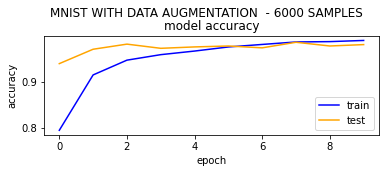

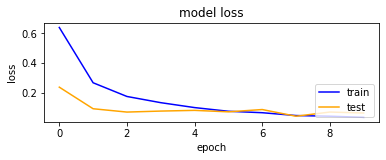

EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000010, Nesterov: 0


In [0]:
### MNIST WITH DATA AUGMENTATION ###

# Import libraries
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) = mnist.load_data()
# X_Train6000, X_Test6000, Y_Train6000, X_Test6000 = train_test_split(trainX)
trainX = trainX[0:6000]
trainY = trainY[0:6000]
testX = testX[0:1000]
testY = testY[0:1000]
# print(Train6000X.shape)

# specify the arguments
rotation_range_val = 30
width_shift_val = 0.2
height_shift_val = 0.2
shear_range_val=45
zoom_range_val=[0.9,1.1]

# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 3
num= num_row*num_col

############################
"""# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(trainX[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(trainY[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(trainX.reshape(trainX.shape[0], 28, 28, 1),trainY.reshape(trainY.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()
"""
for X, Y in datagen.flow(trainX.reshape(trainX.shape[0], 28, 28, 1),trainY.reshape(trainY.shape[0], 1),batch_size=6000,shuffle=False):

     break

#Combine augmented and original into one matrix
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
trainX = np.concatenate((trainX, X), axis=0)
trainX = trainX.reshape((trainX.shape[0], 28, 28))
trainY = np.concatenate((trainY, trainY), axis=0)

#######################################
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0.00001
NestVal = False
LearningRateArray = []

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# define the learning rate change 
def exp_decay(epoch):
    lrate = LearningRate * np.exp(-DecayVal*epoch)
    LearningRateArray.append(lrate)
    return lrate

# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]


# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
#history = cnn4.fit_generator(trainX, trainY, steps_per_epoch=steps, epochs=EpochNum, callbacks=callbacks_list , validation_data=(testX, testY), verbose=2, shuffle = True)
history = cnn4.fit(trainX, trainY, epochs=EpochNum, callbacks=callbacks_list , validation_data=(testX, testY), verbose=2, shuffle = True)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.suptitle('MNIST WITH DATA AUGMENTATION  - 6000 SAMPLES')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))


In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))

EPOCH: 10, LR: 0.0100, Momentum:0.90, Decay: 0.000000, Nesterov: 0
Train on 6000 samples, validate on 1000 samples
Epoch 1/10
 - 21s - loss: 0.3269 - accuracy: 0.8957 - val_loss: 1.2422 - val_accuracy: 0.6070
Epoch 2/10
 - 20s - loss: 0.0752 - accuracy: 0.9812 - val_loss: 0.7577 - val_accuracy: 0.8220
Epoch 3/10
 - 20s - loss: 0.0377 - accuracy: 0.9903 - val_loss: 0.3076 - val_accuracy: 0.9350
Epoch 4/10
 - 20s - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.1251 - val_accuracy: 0.9730
Epoch 5/10
 - 20s - loss: 0.0146 - accuracy: 0.9977 - val_loss: 0.0694 - val_accuracy: 0.9800
Epoch 6/10
 - 20s - loss: 0.0095 - accuracy: 0.9993 - val_loss: 0.0581 - val_accuracy: 0.9800
Epoch 7/10
 - 20s - loss: 0.0081 - accuracy: 0.9992 - val_loss: 0.0504 - val_accuracy: 0.9840
Epoch 8/10
 - 20s - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0535 - val_accuracy: 0.9810
Epoch 9/10
 - 20s - loss: 0.0048 - accuracy: 0.9997 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 10/10
 - 20s - loss: 0.0042 - acc

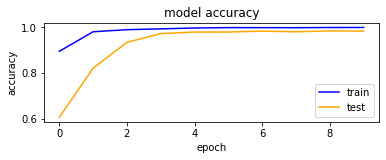

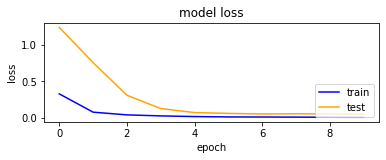

In [0]:
# Mnist without Augmenting

from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import losses
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Load training and test data into dataframes
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX[0:6000]
trainY = trainY[0:6000]
testX = testX[0:1000]
testY = testY[0:1000]

# create the class object
#datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val)
# fit the generator
#datagen.fit(trainX.reshape(trainX.shape[0], 28, 28, 1))
# define number of rows & columns



trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX= trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0

LearningRate = 0.01
EpochNum = 10
MomentumVal = 0.9
DecayVal = 0
NestVal = False

print('EPOCH: %d, LR: %.4f, Momentum:%.2f, Decay: %f, Nesterov: %d' % (EpochNum, LearningRate, MomentumVal, DecayVal, NestVal))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.2))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.2))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.2))

cnn4.add(Dense(10, activation='softmax'))
opt = SGD(lr=LearningRate, momentum=MomentumVal, nesterov=NestVal, decay=DecayVal )
cnn4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#cnn4.summary()

# create data generator
# datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
#it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
#steps = int(trainX.shape[0] / 64)
#history = cnn4.fit(trainX, trainY, steps_per_epoch=64, epochs=EpochNum, validation_data=(testX, testY), verbose=2)
history = cnn4.fit(trainX, trainY,
              batch_size=64,
              epochs=10,
              validation_data=(testX, testY),
              shuffle=True, verbose = 2)

plt.subplot(211)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.suptitle('MNIST WITH DATA AUGMENTATION - 6000 SAMPLES')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [0]:
from sklearn.metrics import classification_report
Y_pred = cnn4.predict(testX, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

import numpy as np
Y_t=np.argmax(testY, axis=1)


print(classification_report(Y_t, Y_pred_bool))